In [1]:
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np


import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.optim as optim
from matplotlib import pyplot as plt

import copy
import pickle
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [6]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img#.numpy()
    plt.imshow(np.transpose(npimg, axes = (1, 2, 0)))
    plt.show()

In [24]:
df_train = pd.read_csv("weight_pretrained1/train_results.csv")
df_test = pd.read_csv("weight_pretrained1/test_results.csv")

In [25]:
df_train

,epochs,argmax > 0.5,argmax < 0.5,focus_true_pred_true,focus_false_pred_true,focus_true_pred_false,focus_false_pred_false
0,4,22735,7265,15233,6205,2356,6206
1,9,22728,7272,16502,6087,2045,5366
2,14,23141,6859,17007,6158,1930,4905
3,19,23748,6252,17589,6190,1778,4443
4,24,23754,6246,17864,6046,1695,4395
5,29,24209,5791,18250,5953,1625,4172
6,34,24215,5785,18234,6049,1528,4189
7,39,24501,5499,18450,6002,1434,4114
8,44,24660,5340,18664,5994,1403,3939
9,49,24775,5225,18845,6033,1414,3708


In [26]:
columns = ["epochs", "argmax > 0.5" ,"argmax < 0.5", "focus_true_pred_true", "focus_false_pred_true", "focus_true_pred_false", "focus_false_pred_false" ]

col1 = df_train[columns[0]]
col2 = df_train[columns[1]] 
col3 = df_train[columns[2]] 
col4 = df_train[columns[3]] 
col5 = df_train[columns[4]] 
col6 = df_train[columns[5]] 
col7 = df_train[columns[6]] 

col1 = df_test[columns[0]] 
col8 = df_test[columns[1]] 
col9 = df_test[columns[2]] 
col10 = df_test[columns[3]] 
col11 = df_test[columns[4]] 
col12 = df_test[columns[5]] 
col13 = df_test[columns[6]] 

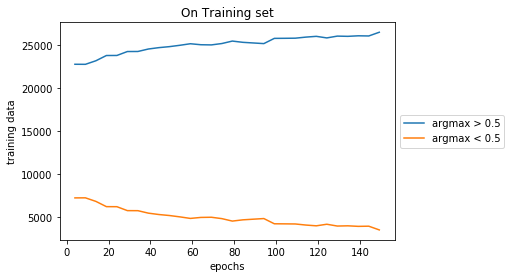

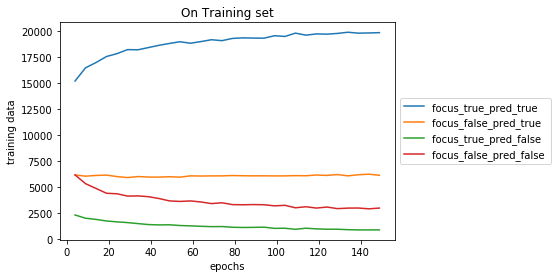

In [27]:
# plt.figure(12,12)
plt.plot(col1,col2, label='argmax > 0.5')
plt.plot(col1,col3, label='argmax < 0.5')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
plt.title("On Training set")
plt.show()

plt.plot(col1,col4, label ="focus_true_pred_true ")
plt.plot(col1,col5, label ="focus_false_pred_true ")
plt.plot(col1,col6, label ="focus_true_pred_false ")
plt.plot(col1,col7, label ="focus_false_pred_false ")
plt.title("On Training set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
plt.show()

In [28]:
df_test

,epochs,argmax > 0.5,argmax < 0.5,focus_true_pred_true,focus_false_pred_true,focus_true_pred_false,focus_false_pred_false
0,4,7373,2627,4821,2148,1037,1994
1,9,7464,2536,5246,2021,852,1881
2,14,7778,2222,5576,1865,676,1883
3,19,7596,2404,5619,1875,664,1842
4,24,7631,2369,5687,1834,766,1713
5,29,7861,2139,5702,1713,676,1909
6,34,8210,1790,5829,1647,574,1950
7,39,8281,1719,5795,1814,593,1798
8,44,7884,2116,5780,1801,639,1780
9,49,8195,1805,5748,1831,741,1680


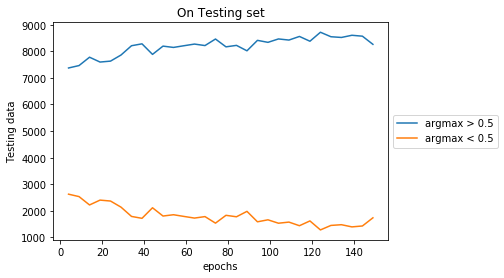

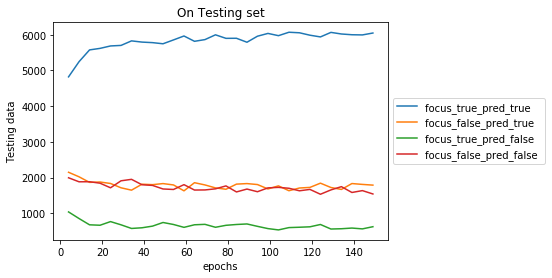

In [29]:
# plt.figure(12,12)
plt.plot(col1,col8, label='argmax > 0.5')
plt.plot(col1,col9, label='argmax < 0.5')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("Testing data")
plt.title("On Testing set")
plt.show()

plt.plot(col1,col10, label ="focus_true_pred_true ")
plt.plot(col1,col11, label ="focus_false_pred_true ")
plt.plot(col1,col12, label ="focus_true_pred_false ")
plt.plot(col1,col13, label ="focus_false_pred_false ")
plt.title("On Testing set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("Testing data")
plt.show()